In [ ]:
# connecting to google drive 
from google.colab import drive
drive.mount("/content/gdrive") # saving the files after the connection under gdrive directory

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# importing 
import os
import shutil
import IPython
import numpy as np
import pandas as pd
import cv2
import collections
import seaborn as sns # for ploting
import matplotlib.pyplot as plt # for ploting
from skimage import filters
from skimage import util
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import MeanShift, estimate_bandwidth
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!unzip /content/gdrive/MyDrive/computer_vision/leaf_dataset_disease_segmentation.zip

unzip:  cannot find or open /content/gdrive/MyDrive/computer_vision/leaf_dataset_disease_segmentation.zip, /content/gdrive/MyDrive/computer_vision/leaf_dataset_disease_segmentation.zip.zip or /content/gdrive/MyDrive/computer_vision/leaf_dataset_disease_segmentation.zip.ZIP.


In [ ]:
# data path
images_path = "/content/data/data/images"
masks_path = "/content/data/data/masks"
sample_path = "/content/data/data/images/00002.jpg"
sample_path = "/content/apple_nobackground.JPG"

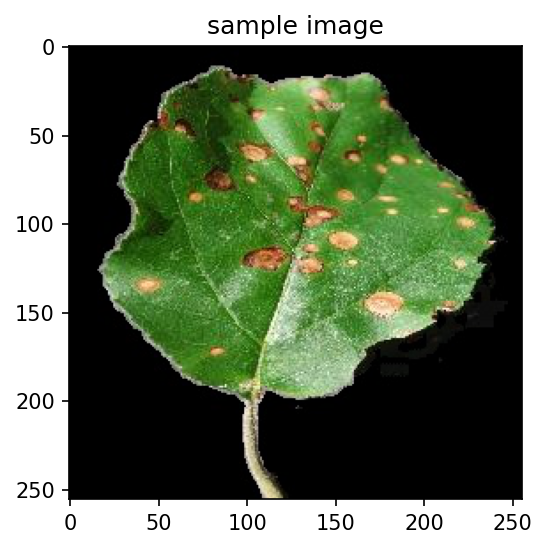

In [ ]:
# showing the sample image
image = plt.imread(sample_path)
width = image.shape[0]
height = image.shape[1]
plt.figure(dpi=150)
plt.title('sample image')
plt.imshow(image)

In [ ]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    # removing the a class from the image
    #labels = [1 if i == 3 else 0 for i in labels]
    return codebook[labels].reshape(w, h, -1)

def get_mask_disease(image, labels):
  for i in image.shape[0]:
    for y in image.shape[1]:
      if image[i,y] == labels:
        image[i,y] = 1
      else:
        image[i,y] = 0
  return image

In [ ]:
index = pd.MultiIndex.from_product(
    (*map(range, image.shape[:2]), ('r', 'g', 'b')),
    names=('row', 'col', None))
df = pd.Series(image.flatten(), index=index)
df = df.unstack()
df = df.reset_index().reindex(columns=['col','row',   'r','g','b'])
#df.head(10)

In [ ]:
df_rgb = df[['r', 'g', 'b']]
#df_rgb.head(10)

In [ ]:
# normalizing pixels
nd_1 = MinMaxScaler(feature_range=(0, 1)).fit_transform(df)
nd_2 = MinMaxScaler(feature_range=(0, 1)).fit_transform(df_rgb)

In [ ]:
#bandwidth_1 = estimate_bandwidth(nd_1, quantile=.04, n_jobs=-1)
bandwidth_2 = estimate_bandwidth(nd_2, quantile=.04, n_jobs=-1)

In [ ]:
ms_1 = MeanShift(bandwidth = 0.12 , n_jobs=-1, bin_seeding=True, cluster_all=True).fit(nd_1)
ms_2 = MeanShift(bandwidth = bandwidth_2 , n_jobs=-1, bin_seeding=True,cluster_all=True).fit(nd_2)

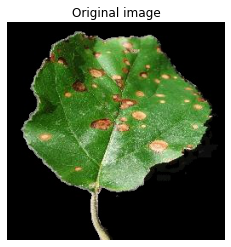

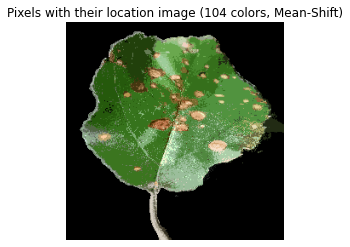

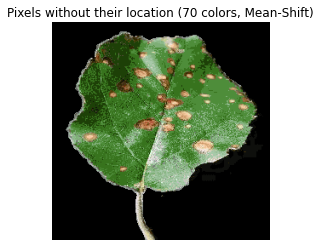

In [ ]:
import cv2
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image', loc='center')
plt.imshow(image)
plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Pixels with their location image ({} colors, Mean-Shift)'.format(len(ms_1.cluster_centers_)), loc='center')
plt.imshow(recreate_image(ms_1.cluster_centers_[:, 2:], ms_1.labels_, width, height));
plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Pixels without their location ({} colors, Mean-Shift)'.format(len(ms_2.cluster_centers_)), loc='center')
plt.imshow(recreate_image(ms_2.cluster_centers_, ms_2.labels_, width, height))
newimage = recreate_image(ms_2.cluster_centers_, ms_2.labels_, width, height)
plt.savefig("test")

In [ ]:
#